## BASIC IMAGE PROCESSING IN PYTHON
- https://github.com/sjchoi86/advanced-tensorflow/blob/master/basic/basic_imghandling.ipynb

In [1]:
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline
print("PACKAGES LOADED.")

PACKAGES LOADED.


#### PRINT CURRENT FOLDER

In [3]:
cwd = os.getcwd()
print("Current folder is %s" % (cwd))

Current folder is /Users/jkpark/Documents/dev/deep-learning/practice-for-advanced-tf


#### PRINT FUNCTION

In [8]:
def print_typeshape(img):
    print("Type is %s" % (type(img)))
    print("Shape is %s" % (img.shape,))

#### LOAD AN IMAGE

In [9]:
dog = imread("./img/dog.jpg")
print_typeshape(dog)

Type is <class 'numpy.ndarray'>
Shape is (305, 593, 3)


#### PLOT LOADED IMAGE

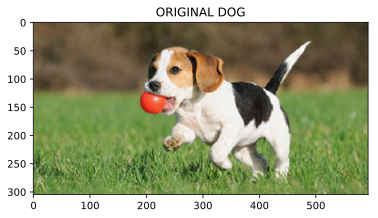

In [10]:
plt.figure(0)
plt.imshow(dog)
plt.title("ORIGINAL DOG")
plt.draw()

#### LOAD + CAST TO FLAOT?
- int 를 float 로 바꿨는데, 그림을 그리면 이상하게 나옴
- why? imread 가 정수면 0-225 사이의 값을 찾고, float 면 0-1 까지의 값인줄 알고 찾기떄문

Type is <class 'numpy.ndarray'>
Shape is (305, 593, 3)


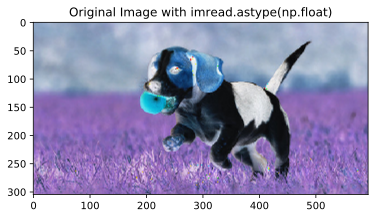

In [11]:
# LOAD
dog2 = imread("./img/dog.jpg").astype(np.float)
print_typeshape(dog2)
# PLOT
plt.figure(0)
plt.imshow(dog2)
plt.title("Original Image with imread.astype(np.float)")
plt.draw()

### WHY DOES THIS DOG LOOK SO WEIRD?

#### LOAD + CAST TO FLOAT + NORMALIZE TO 0~1

Type is <class 'numpy.ndarray'>
Shape is (305, 593, 3)


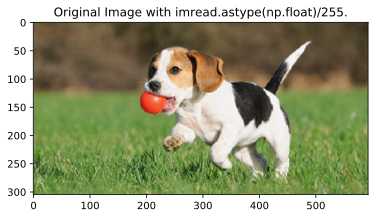

In [12]:
# LOAD
dog3 = imread("./img/dog.jpg").astype(np.float)
print_typeshape(dog2)
# PLOT
plt.figure(0)
plt.imshow(dog3/255.)
plt.title("Original Image with imread.astype(np.float)/255.")
plt.draw()

#### RESIZE
- 딥러닝에선 모두 정사이즈로함

Type is <class 'numpy.ndarray'>
Shape is (100, 100, 3)


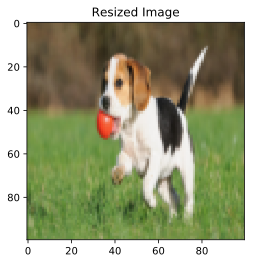

In [13]:
# RESIZE
dogsmall = imresize(dog, [100, 100, 3])
print_typeshape(dogsmall)
# PLOT
plt.figure(1)
plt.imshow(dogsmall)
plt.title("Resized Image")
plt.draw()

#### GRAYSCALE
- 일반적으로 없어서, 간단한 함수를 만들어야함
- [...,:3] : 앞의 차원은 신경안쓰고, 맨 뒤 3개 차원에만 뒤의 [i, j, k] 연산

In [52]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print("Current Image if GRAY!")
        return rgb

In [54]:
dogsmallgray = rgb2gray(dogsmall)
print("size of dogsmallgray is %s" % (dogsmallgray.shape,))
print("type of dogsmallgray is", type(dogsmallgray))

size of dogsmallgray is (100, 100)
type of dogsmallgray is <class 'numpy.ndarray'>


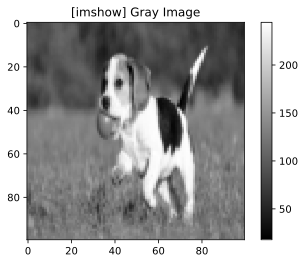

In [56]:
plt.imshow(dogsmallgray, cmap=plt.get_cmap("gray"))
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

#### RESHAPE
- 한줄로 펴주는 작업
- (1, -1) : (1차원, 나머지 dim 은 알아서 맞춰줘)

In [60]:
# MATRIX TO VECTOR
dogrowvec = np.reshape(dogsmallgray, [1, -1]);
print("size of dogrowvec is %s" % (dogrowvec.shape,))
print("type of dogrowvec is", type(dogrowvec))

# VECTOR TO MATRIX
dogmatrix = np.reshape(dogrowvec, (100, -1));
print ("size of dogmatrix is %s" % (dogmatrix.shape,))
print ("type of dogmatrix is", type(dogmatrix))

size of dogrowvec is (1, 10000)
type of dogrowvec is <class 'numpy.ndarray'>
size of dogmatrix is (100, 100)
type of dogmatrix is <class 'numpy.ndarray'>


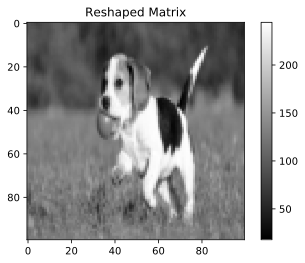

In [63]:
plt.imshow(dogmatrix, cmap=plt.get_cmap("gray"))
plt.title("Reshaped Matrix")
plt.colorbar()
plt.draw()

### LOAD FROM FOLDER

#### FIRST, SEE WHAT'S INSIDE THE FOLDER

In [65]:
cwd = os.getcwd()
path = cwd + "/img/"
flist = os.listdir(path)
print("[%d] FILE ARE IN [%s]" % (len(flist), path))

[2] FILE ARE IN [/Users/jkpark/Documents/dev/deep-learning/practice-for-advanced-tf/img/]


#### LIST UP FILES INSIDE THE FOLDER

In [68]:
for i, f in enumerate(flist):
    print("[%d]TH FILE IS [%s]" % (i, f))

[0]TH FILE IS [cat.jpg]
[1]TH FILE IS [dog.jpg]


#### LOAD IMAGES WITH APPROPRIATE EXTENSIONS

In [69]:
valid_exts = [".jpg", ".gif", ".png", ".tga", ".jpeg"]
imgs = []
names = []
for f in flist:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_exts:
        continue
        
    # LOAD AND APPEND TO IMGS LIST
    fullpath = os.path.join(path, f)
    imgs.append(imread(fullpath))
    # APPEND NAMES
    names.append(os.path.splitext(f)[0])

#### PLOT LOARED IMAGES

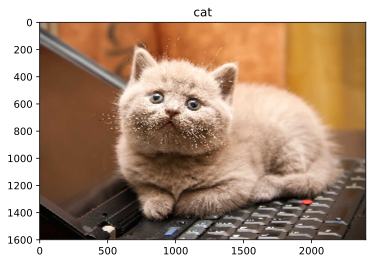

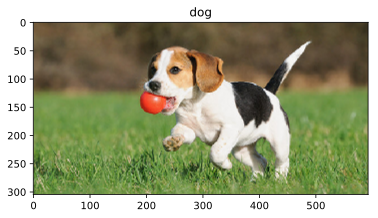

In [71]:
for img, name in zip(imgs, names):
    plt.imshow(img)
    plt.title(name)
    plt.show()